# Hacemos las importaciones

In [ ]:
from google.colab import drive;

drive.mount('/content/drive')

import math;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)



# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

Mounted at /content/drive


#Primera predicción

##Analizamos los datos

In [ ]:
pd.set_option('display.float_format',lambda x: '%.3f' %x);

wine = pd.read_csv("/content/drive/MyDrive/mia/winemag-data-130k-v2.csv", thousands=",");

wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
wine.describe()

,Unnamed: 0,points,price
count,129971.000,129971.000,120975.000
mean,64985.000,88.447,35.363
std,37519.540,3.040,41.022
min,0.000,80.000,4.000
25%,32492.500,86.000,17.000
50%,64985.000,88.000,25.000
75%,97477.500,91.000,42.000
max,129970.000,100.000,3300.000


In [ ]:
wine.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

El dataset tiene 129.971 registros. 
Cuenta con 11 object, 2 int64 y 1 float64
Arriba podemos ver la cantidad de nulos que tiene el dataset por columna

##Hacemos una copia de los datos originales

In [ ]:
list(wine.columns)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [ ]:
wine_ori = wine.copy(deep=True)
wine.columns = ['Unnamed',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']


##Eliminamos la columna Unnamed:0, ya que es el índice y no nos aporta nada

In [ ]:
wines = wine.drop(['Unnamed'], axis=1)

##Histogramas de las variables numéricas

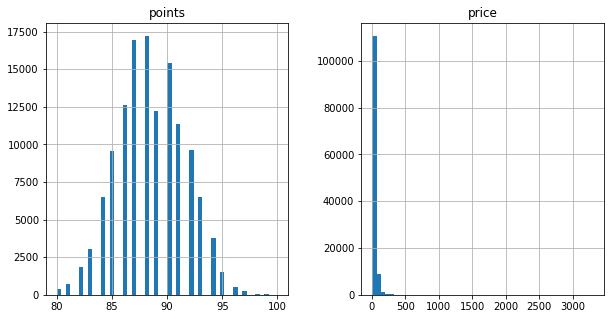

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt;

wines.hist(bins=50, figsize=(10,5));
plt.show();

##Analizamos las columnas discretas para poder detectar algún outlier

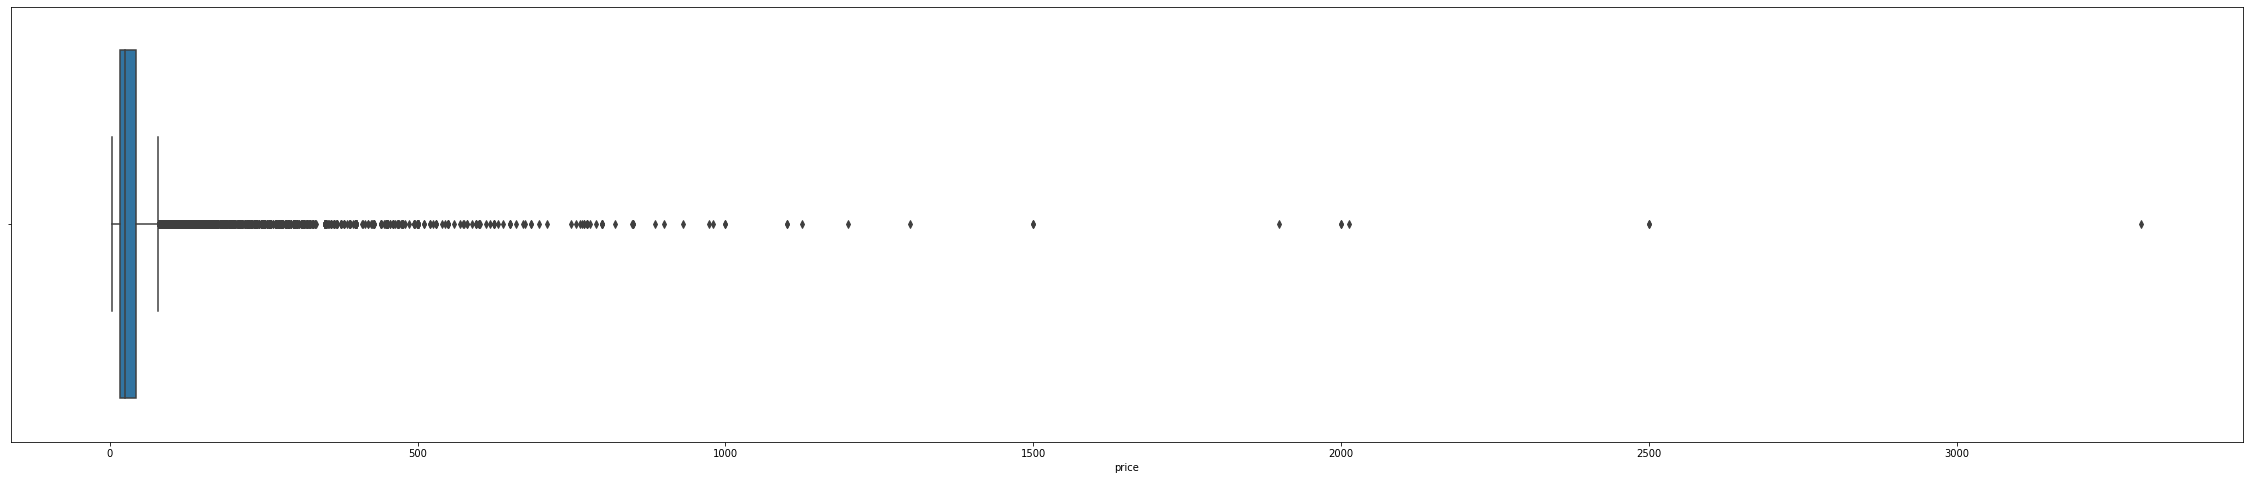

In [ ]:
f, ax = plt.subplots(figsize=(40, 8))
sns.boxplot(data=wines,x='price')


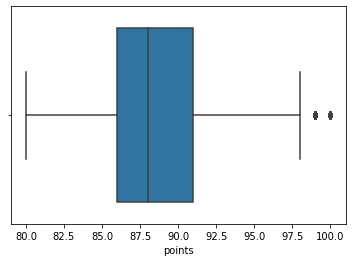

In [ ]:
sns.boxplot(data=wines,x='points')

##Ahora analizamos las variables no numéricas para ver si podemos encontrar alguna relación o alguna forma de relacionarla

In [ ]:
wines['country'].unique()


array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [ ]:
paises=wines["country"].value_counts()
print(paises)



US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [ ]:
 wines['region_1'].unique()



array(['Etna', nan, 'Willamette Valley', ..., 'Del Veneto',
       'Bardolino Superiore', 'Paestum'], dtype=object)

In [ ]:
paises=wines["region_1"].value_counts()
print(paises)

Napa Valley                4480
Columbia Valley (WA)       4124
Russian River Valley       3091
California                 2629
Paso Robles                2350
                           ... 
Lamezia                       1
Trentino Superiore            1
Grave del Friuli              1
Vin Santo di Carmignano       1
Paestum                       1
Name: region_1, Length: 1229, dtype: int64


In [ ]:
  wines['region_2'].unique()


array([nan, 'Willamette Valley', 'Napa', 'Sonoma', 'Central Coast',
       'Oregon Other', 'Central Valley', 'North Coast', 'Columbia Valley',
       'California Other', 'Finger Lakes', 'Sierra Foothills',
       'New York Other', 'Long Island', 'Napa-Sonoma', 'Southern Oregon',
       'Washington Other', 'South Coast'], dtype=object)

In [ ]:
paises=wines["region_2"].value_counts()
print(paises)

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64


In [ ]:
   wines['winery'].unique()




array(['Nicosia', 'Quinta dos Avidagos', 'Rainstorm', ...,
       'Mas de Pampelonne', 'Bodegas Eidosela', 'Penedo Borges'],
      dtype=object)

In [ ]:
bodegas=wines["winery"].value_counts()
print(bodegas)

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
Hypothesis              1
Camps d'Estels          1
Harbor Town             1
Château de Saurs        1
Penedo Borges           1
Name: winery, Length: 16757, dtype: int64


In [ ]:
wines['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [ ]:
wines['taster_twitter_handle'].unique()

array(['@kerinokeefe', '@vossroger', '@paulgwine\xa0', nan, '@wineschach',
       '@vboone', '@mattkettmann', '@wawinereport', '@gordone_cellars',
       '@JoeCz', '@AnneInVino', '@laurbuzz', '@worldwineguys',
       '@suskostrzewa', '@bkfiona', '@winewchristina'], dtype=object)

In [ ]:
wines['variety'].unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

In [ ]:
wines['designation'].describe()

count       92506
unique      37979
top       Reserve
freq         2009
Name: designation, dtype: object

In [ ]:
wines['title'].describe()

count                                                129971
unique                                               118840
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                     11
Name: title, dtype: object

##Como hay columnas que bastantes nulos voy a eliminar las columnas con más del 50% de los datos nulos

In [ ]:
wines.dropna(axis=1,thresh=(wines.country.count()/2),inplace=True)
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   taster_name            103727 non-null  object 
 8   taster_twitter_handle  98758 non-null   object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


Elimina la columna de region_2

##Compruebo si hay filas duplicadas

In [ ]:
wines.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129966    False
129967    False
129968    False
129969    False
129970    False
Length: 129971, dtype: bool

##Reemplazamos los valores nulos de price con la mediana

In [ ]:
wines['price']=wines['price'].fillna(value=wines['price'].mean())
#wines= wines.drop(["price"], axis = 1);

In [ ]:
wines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   taster_name            103727 non-null  object 
 8   taster_twitter_handle  98758 non-null   object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


##Reemplazamos los valores del dataset que no son números por el contenido del anterior

In [ ]:
wines_limpio = wines.fillna(method='ffill')
wines_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


##Creo una nueva columna llamada localizacion donde unimos país, provincia, region_1 y elimino las columnas que pasaron a formar parte de localizacion

In [ ]:
wines_limpio['localizacion'] = wines_limpio[['country', 'province','region_1']].apply(' '.join, axis=1)
wines_limpio= wines_limpio.drop(["country"], axis = 1);
wines_limpio= wines_limpio.drop(["province"], axis = 1);
wines_limpio= wines_limpio.drop(["region_1"], axis = 1);
wines_limpio

,description,designation,points,price,taster_name,taster_twitter_handle,title,variety,winery,localizacion
0,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Italy Sicily & Sardinia Etna
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Portugal Douro Etna
2,"Tart and snappy, the flavors of lime flesh and...",Avidagos,87,14.000,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,US Oregon Willamette Valley
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000,Alexander Peartree,@paulgwine,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,US Michigan Lake Michigan Shore
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,US Oregon Willamette Valley
...,...,...,...,...,...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000,Anna Lee C. Iijima,@vossroger,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Germany Mosel Alsace
129967,Citation is given as much as a decade of bottl...,Brauneberger Juffer-Sonnenuhr Spätlese,90,75.000,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,US Oregon Oregon
129968,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,France Alsace Alsace
129969,"A dry style of Pinot Gris, this is crisp with ...",Kritt,90,32.000,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,France Alsace Alsace


##A las columnas de designation, taster_name, variety, winery y localizacion les voy a dar un valor numérico para buscar alguna correlación con la puntuación. Voy a eliminar la columna  taster_twiter_handle porque tengo el taster_name que es la misma persona y tiene más datos. También voy a eliminar la columna descripción y title porque no voy a poder extraer relación con puntuación

In [ ]:
wines_limpio= wines_limpio.drop(["taster_twitter_handle"], axis = 1);
wines_limpio= wines_limpio.drop(["description"], axis = 1);
wines_limpio= wines_limpio.drop(["title"], axis = 1);
wines_limpio

,designation,points,price,taster_name,variety,winery,localizacion
0,Vulkà Bianco,87,35.363,Kerin O’Keefe,White Blend,Nicosia,Italy Sicily & Sardinia Etna
1,Avidagos,87,15.000,Roger Voss,Portuguese Red,Quinta dos Avidagos,Portugal Douro Etna
2,Avidagos,87,14.000,Paul Gregutt,Pinot Gris,Rainstorm,US Oregon Willamette Valley
3,Reserve Late Harvest,87,13.000,Alexander Peartree,Riesling,St. Julian,US Michigan Lake Michigan Shore
4,Vintner's Reserve Wild Child Block,87,65.000,Paul Gregutt,Pinot Noir,Sweet Cheeks,US Oregon Willamette Valley
...,...,...,...,...,...,...,...
129966,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000,Anna Lee C. Iijima,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Germany Mosel Alsace
129967,Brauneberger Juffer-Sonnenuhr Spätlese,90,75.000,Paul Gregutt,Pinot Noir,Citation,US Oregon Oregon
129968,Kritt,90,30.000,Roger Voss,Gewürztraminer,Domaine Gresser,France Alsace Alsace
129969,Kritt,90,32.000,Roger Voss,Pinot Gris,Domaine Marcel Deiss,France Alsace Alsace


In [ ]:
from sklearn import preprocessing
vinos = preprocessing.LabelEncoder()

vinos.fit(wines_limpio['designation'])
wines_limpio['designation'] = vinos.transform(wines_limpio['designation'])

vinos.fit(wines_limpio['taster_name'])
wines_limpio['taster_name'] = vinos.transform(wines_limpio['taster_name'])

vinos.fit(wines_limpio['variety'])
wines_limpio['variety'] = vinos.transform(wines_limpio['variety'])

vinos.fit(wines_limpio['winery'])
wines_limpio['winery'] = vinos.transform(wines_limpio['winery'])

vinos.fit(wines_limpio['localizacion'])
wines_limpio['localizacion'] = vinos.transform(wines_limpio['localizacion'])

wines_limpio.columns = ['price',
                        'points',
                'designation',
                'taster_name',
                'variety',
                'winery',
                'localizacion']

wines_limpio

,price,points,designation,taster_name,variety,winery,localizacion
0,36805,87,35.363,9,690,11608,6243
1,2325,87,15.000,15,450,12956,7946
2,2325,87,14.000,14,436,13018,10992
3,27974,87,13.000,0,479,14390,10949
4,36465,87,65.000,14,440,14621,10992
...,...,...,...,...,...,...,...
129966,4235,90,28.000,1,479,6643,4484
129967,4235,90,75.000,14,440,4776,10983
129968,17463,90,30.000,15,209,5929,3896
129969,17463,90,32.000,15,436,6027,3896


##Vuelvo a analizar las correleciones con las columnas en formato numérico

##Histogramas

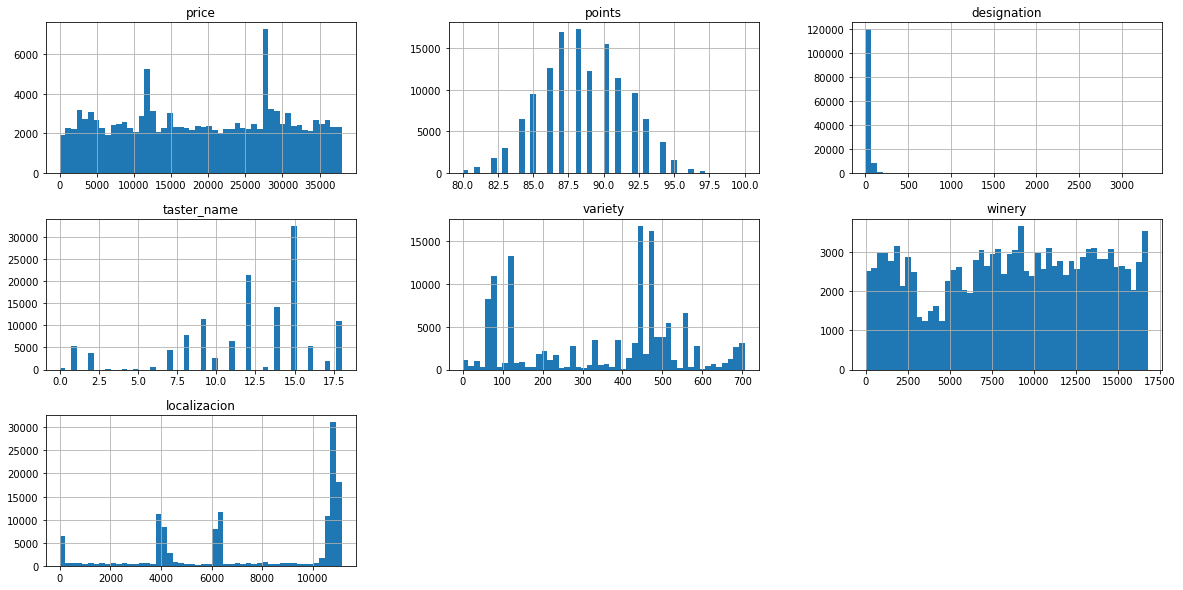

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt;

wines_limpio.hist(bins=50, figsize=(20,10));
plt.show();

##Matriz de correlación

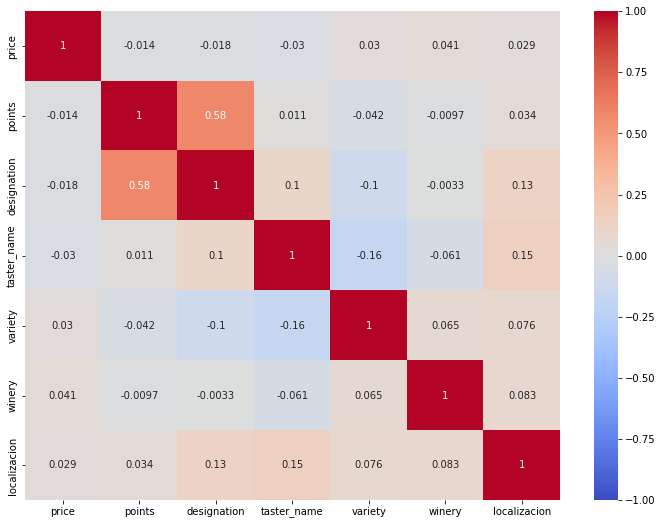

In [ ]:
f, ax = plt.subplots(figsize=(12,9))


sns.heatmap(wines_limpio.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

##Copia para clasificador múltiple

In [ ]:
wines_multiple = wines_limpio.copy(deep=True)
wines_limpio

NameError: ignored

##Separamos los datos para hacer una primera predicción, creamos el train set y el test set

In [ ]:

from sklearn.model_selection import train_test_split;

train_set, test_set = train_test_split(wines_limpio, test_size=0.2, random_state=42);

X = train_set.drop("points",axis=1);
y = train_set["points"].copy();

X_test = test_set.drop("points", axis=1);
y_test = test_set["points"].copy();



##Clasificador binario para separar los vinos mayores o iguales de la media + 1 sigma de los menores

In [ ]:
wines_limpio.describe()

,price,points,designation,taster_name,variety,winery,localizacion
count,129971.000,129971.000,129971.000,129971.000,129971.000,129971.000,129971.000
mean,19173.263,88.447,35.363,12.150,352.532,8706.320,7568.548
std,10867.239,3.040,39.577,4.238,195.965,4848.256,3526.613
min,0.000,80.000,4.000,0.000,0.000,0.000,0.000
25%,10031.500,86.000,18.000,9.000,125.000,4884.000,4209.000
50%,19256.000,88.000,28.000,14.000,440.000,8974.000,8676.000
75%,28377.000,91.000,40.000,15.000,492.000,12918.000,10784.000
max,37978.000,100.000,3300.000,18.000,706.000,16756.000,11132.000


##Dato donde vamos a hacer el corte media + sigma 1

In [ ]:
mean_wines = wines_limpio['points'].mean()
sigma      = wines_limpio['points'].std()
dato = mean_wines + sigma
print(dato)

91.48686841067027


##Clasificador binario

In [ ]:

y_train_dato = (y >= dato);
y_test_dato  = (y_test  >= dato);

from sklearn.linear_model import SGDClassifier;

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42);
sgd_clf.fit(X, y_train_dato); #clasifica solo si es >= dato, true o false



In [ ]:

from sklearn.model_selection import cross_val_score;
score = cross_val_score(sgd_clf, X, y_train_dato, cv=3, scoring="accuracy")
print(np.mean(score), np.std(score));

0.7370364337017712 0.13937054079602193


## Measuring Accuracy Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X, y_train_dato, cv=3)

##Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix;

confusion_matrix(y_train_dato, y_train_pred)

array([[70374, 15869],
       [11473,  6260]])

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score;

precision=precision_score(y_train_dato, y_train_pred);

recall   =recall_score(y_train_dato, y_train_pred);

print(precision, recall);

0.2828867097473903 0.35301415440139855


##fi_score

In [ ]:
from sklearn.metrics import f1_score;

f1_score(y_train_dato, y_train_pred)

0.3140835883799106

## Precision/Recall Trade-off

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X,y_train_dato,cv=3,method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_dato, y_scores)

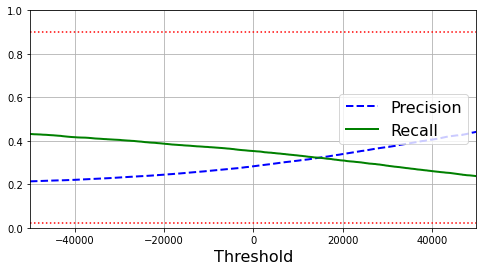

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

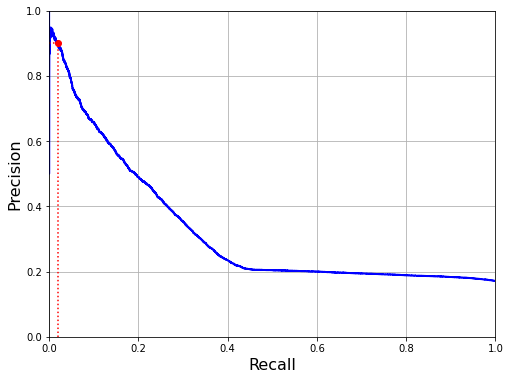

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

## The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve;

fpr,tpr, thressholds = roc_curve(y_train_dato, y_scores);

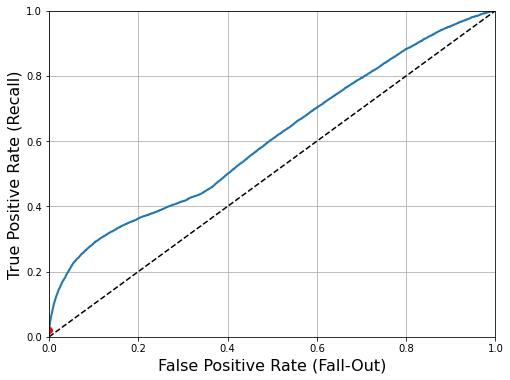

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score;

roc_auc_score(y_train_dato, y_scores)

0.6061730754141499

##Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier;

forest_clf = RandomForestClassifier(random_state=42);

#permito que el cross_vall_predict entrene
y_probas_forest = cross_val_predict(forest_clf, X, y_train_dato, cv=3, method="predict_proba");

y_scores_forest = y_probas_forest[:, 1]

#creo la curva
fpr_forest, tpr_forest, thressholds_forest = roc_curve(y_train_dato, y_scores_forest)

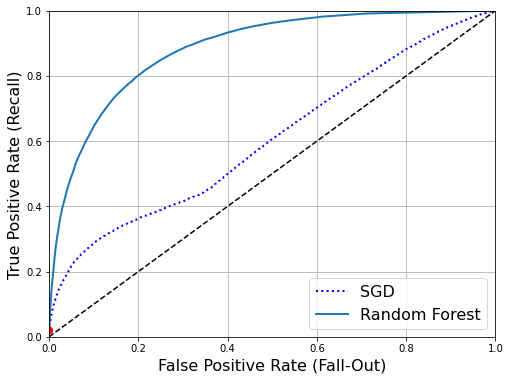

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
roc_auc_score(y_train_dato, y_scores_forest)

0.8835138646506321

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_tr = scaler.fit_transform(X)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_tr, y)


#Calculamos el error cuadratico medio:
wines_predictions = forest_reg.predict(X_tr) 
forest_rmse = mean_squared_error(y, wines_predictions)
forest_rmse = np.sqrt(forest_rmse)
print('Error: ',forest_rmse)

Error:  0.8425129876908273


In [ ]:
X_test_tr = scaler.fit_transform(X_test)

#Calculamos el error cuadratico medio:
wines_predictions = forest_reg.predict(X_test_tr) 
forest_rmse = mean_squared_error(y_test, wines_predictions)
forest_rmse = np.sqrt(forest_rmse)
print('Error: ',forest_rmse)

Error:  2.3145764413632377


#Segunda predicción

##Después de una primera predicción vamos a analizar los outliers

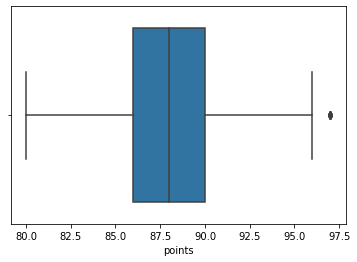

In [ ]:
sns.boxplot(data=wines_limpio,x='points')

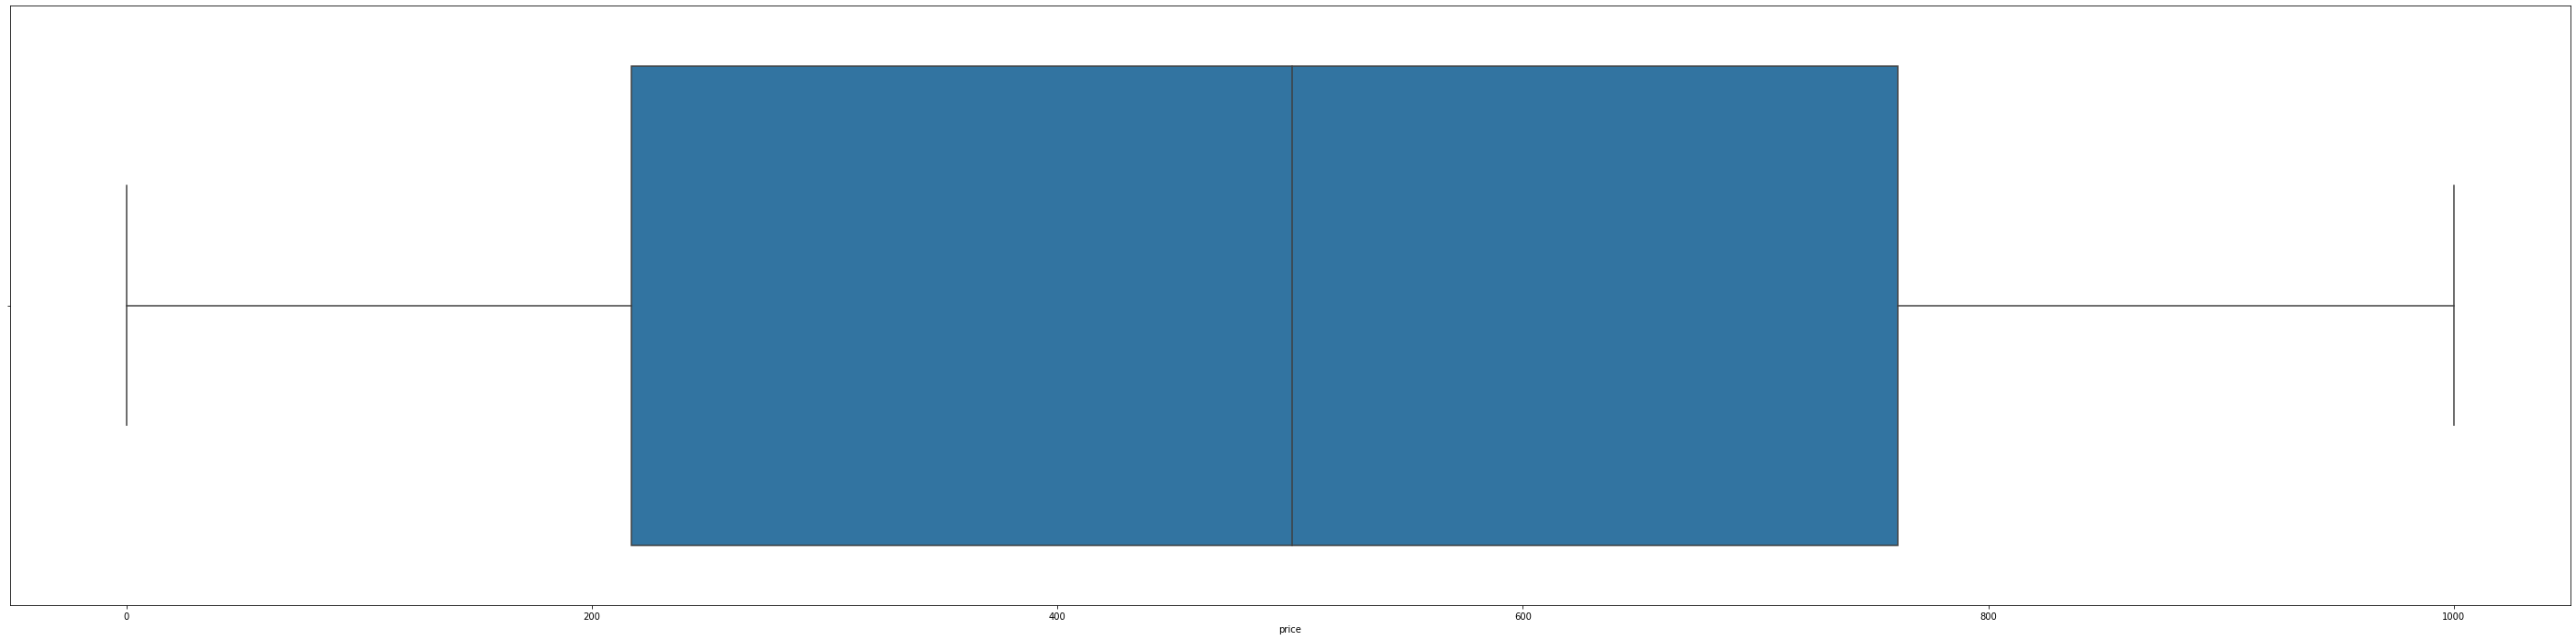

In [ ]:
f, ax = plt.subplots(figsize=(50, 12))
sns.boxplot(data=wines_limpio,x='price')

##Borramos los outliers

In [ ]:
rows = wines_limpio[wines_limpio.points > 99].index
wines_limpio = wines_limpio.drop(rows);

rows = wines_limpio[wines_limpio.price > 1000].index
wines_limpio = wines_limpio.drop(rows);
wines_limpio

,price,points,designation,taster_name,variety,winery,localizacion
45,2,86,37,12,473,14729,11011
62,899,86,21,16,71,13022,11017
165,195,91,28,12,80,5080,3202
197,220,90,19,10,137,14356,10430
213,71,90,45,11,473,10381,10779
...,...,...,...,...,...,...,...
129604,407,84,55,7,80,14760,10763
129777,296,89,67,12,280,1412,63
129867,174,90,75,16,62,14791,11017
129868,930,90,33,18,560,131,10790


##Vamos a probar si los datos mejoran sin los outliers

In [ ]:
from sklearn.model_selection import train_test_split;

train_set, test_set = train_test_split(wines_limpio, test_size=0.2, random_state=42);

X = train_set.drop("points",axis=1);
y = train_set["points"].copy();

X_test = test_set.drop("points", axis=1);
y_test = test_set["points"].copy();

In [ ]:
mean_wines = wines_limpio['points'].mean()
sigma      = wines_limpio['points'].std()
dato = mean_wines + sigma

In [ ]:
y_train_dato = (y >= dato);
y_test_dato  = (y_test  >= dato);

from sklearn.linear_model import SGDClassifier;

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42);
sgd_clf.fit(X, y_train_dato); #clasifica solo si es >= dato, true o false

##Volvemos a probar el clasificador binario


In [ ]:
from sklearn.model_selection import cross_val_score;
score = cross_val_score(sgd_clf, X, y_train_dato, cv=3, scoring="accuracy")
print(np.mean(score), np.std(score));

0.8470588235294118 0.016810223724982618


## Measuring Accuracy Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X, y_train_dato, cv=3)

##Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix;

confusion_matrix(y_train_dato, y_train_pred)

array([[1684,   64],
       [ 248,   44]])

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score;

precision=precision_score(y_train_dato, y_train_pred);

recall   =recall_score(y_train_dato, y_train_pred);

print(precision, recall);

0.4074074074074074 0.1506849315068493


##f1 score

In [ ]:
from sklearn.metrics import f1_score;

f1_score(y_train_dato, y_train_pred)

0.22

Al eliminar los outliers sube nuestra predicción, el f1 score y baja el recoll 

## Precision/Recall Trade-off

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X,y_train_dato,cv=3,method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_dato, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

IndexError: ignored

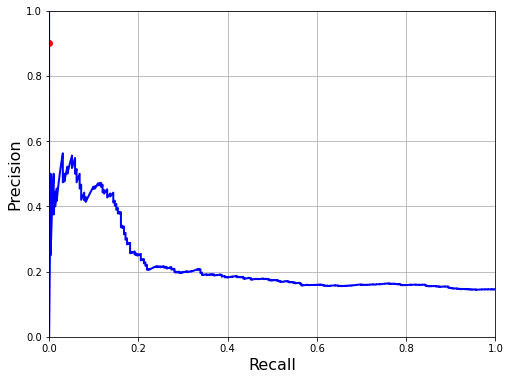

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

## The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve;

fpr,tpr, thressholds = roc_curve(y_train_dato, y_scores);

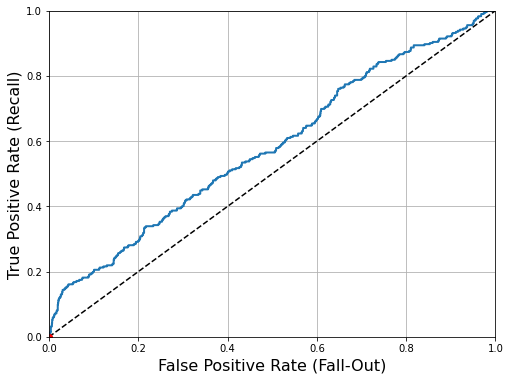

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score;

roc_auc_score(y_train_dato, y_scores)

0.5804539826337732

##Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier;

forest_clf = RandomForestClassifier(random_state=42);

#permito que el cross_vall_predict entrene
y_probas_forest = cross_val_predict(forest_clf, X, y_train_dato, cv=3, method="predict_proba");

y_scores_forest = y_probas_forest[:, 1]

#creo la curva
fpr_forest, tpr_forest, thressholds_forest = roc_curve(y_train_dato, y_scores_forest)

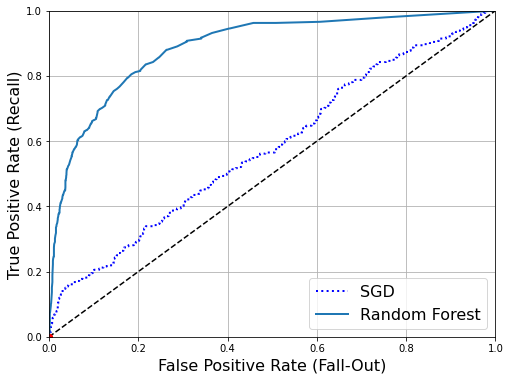

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
roc_auc_score(y_train_dato, y_scores_forest)

0.8880168333281089

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_tr = scaler.fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_tr, y)


#Calculamos el error cuadratico medio:
wines_predictions = forest_reg.predict(X_tr) 
forest_rmse = mean_squared_error(y, wines_predictions)
forest_rmse = np.sqrt(forest_rmse)
print('Error: ',forest_rmse)

Error:  0.8527439340321573


In [ ]:
X_test_tr = scaler.fit_transform(X_test)

#Calculamos el error cuadratico medio:
wines_predictions = forest_reg.predict(X_test_tr) 
forest_rmse = mean_squared_error(y_test, wines_predictions)
forest_rmse = np.sqrt(forest_rmse)
print('Error: ',forest_rmse)

Error:  2.257903144657917


##Volvemos al algoritmo antes de aplicar el separador binario, y hacemos la predicción con todos los datos sin separar en la media + sigma1, agrupamos las puntuaciones en 4 o 5 clases

In [ ]:
wines_multiple.describe()

,price,points,designation,taster_name,variety,winery,localizacion
count,129971.000,129971.000,129971.000,129971.000,129971.000,129971.000,129971.000
mean,19173.263,88.447,35.363,12.150,352.532,8706.320,7568.548
std,10867.239,3.040,39.577,4.238,195.965,4848.256,3526.613
min,0.000,80.000,4.000,0.000,0.000,0.000,0.000
25%,10031.500,86.000,18.000,9.000,125.000,4884.000,4209.000
50%,19256.000,88.000,28.000,14.000,440.000,8974.000,8676.000
75%,28377.000,91.000,40.000,15.000,492.000,12918.000,10784.000
max,37978.000,100.000,3300.000,18.000,706.000,16756.000,11132.000


In [ ]:
wines_multiple['points']

0         87
1         87
2         87
3         87
4         87
          ..
129966    90
129967    90
129968    90
129969    90
129970    90
Name: points, Length: 129971, dtype: int64

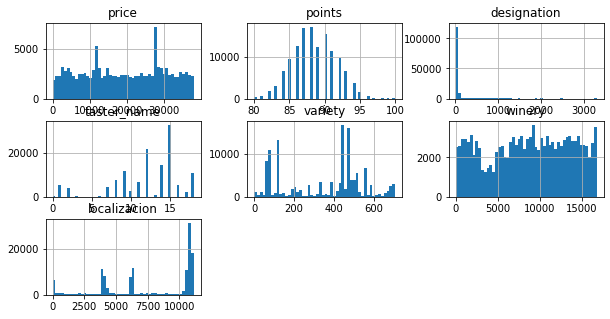

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt;

wines_multiple.hist(bins=50, figsize=(10,5));
plt.show();

##Clasificador múltiple

##Separa los datos de la columna points en cuatro grupos y les cambio el valor por 85,90,95 o 100 dependiendo de donde está el dato de points

90    0.572
95    0.252
85    0.169
100   0.007
Name: points_div, dtype: float64
90    0.572
95    0.252
85    0.169
100   0.007
Name: points_div, dtype: float64


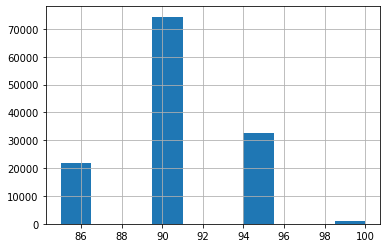

In [ ]:
wines_multiple["points_div"] = pd.cut(wines_multiple["points"], bins=[79., 85, 90, 95., np.inf], labels=[85, 90, 95, 100])

wines_multiple["points_div"].hist();

from sklearn.model_selection import StratifiedShuffleSplit;

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42);

for train_index, test_index in split.split(wines_multiple, wines_multiple["points_div"]):
    strat_train_set = wines_multiple.loc[train_index]
    strat_test_set = wines_multiple.loc[test_index]

print(strat_train_set["points_div"].value_counts()/len(strat_train_set))
print(strat_test_set["points_div"].value_counts()/len(strat_test_set))

for set_ in (strat_train_set, strat_test_set):
    set_.drop("points_div", axis=1, inplace=True)


#Evito el sesgo en la separición de los datos con respecto a la puntuación, los separo en 4 categorías y reparto los datos en los dos sets, data set y data test



In [ ]:
vinos = strat_train_set


##Separamos nuevamente los datos

In [ ]:
from sklearn.model_selection import train_test_split;

X = strat_train_set.drop("points",axis=1);
y = strat_train_set["points"].copy();

X_test = strat_test_set.drop("points", axis=1);
y_test = strat_test_set["points"].copy();

##Escalamos los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler();

X_tr = scaler.fit_transform(X); 

##Hacemos la inferencia y vemos el error cuadrático medio

In [ ]:
from sklearn.tree import DecisionTreeRegressor;
tree_reg = DecisionTreeRegressor(random_state=42);
tree_reg.fit(X_tr, y);

predictions = tree_reg.predict(X_tr)

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3654549029820851

In [ ]:

X_test_tr = scaler.fit_transform(X_test);

predictions = tree_reg.predict(X_test_tr)

lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.1430537545356265

In [ ]:
from time import CLOCK_PROCESS_CPUTIME_ID
from math import sqrt;
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_tr, y, scoring= "neg_mean_squared_error")
scores = np.sqrt

##f1

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_tr, y)


#Calculamos el error cuadratico medio:
wines_predictions = forest_reg.predict(X_tr) 
forest_rmse = mean_squared_error(y, wines_predictions)
forest_rmse = np.sqrt(forest_rmse)
print('Error: ',forest_rmse)




Error:  0.8424256619685712
